# Part II - (Prosper Loan Presentation)
## by (EGBEAHIE, WHITNEY EHILUONAMHEN)

## Investigation Overview


> It can be shown from the relationship of loan amount and monthly payment by encoding with two colors with two employment status namely; employed and self-employed, there are two colors representation due to the two categories of Employment status which are employed and self-employed. Both variations exhibited linear positive relationships with employed having the highest Loan Amount as well as highest monthly loan payment. Basically, more people were also given loan in the employed category than in the self-employed category.


## Dataset Overview

> This is a Prosper Loan Data with 113,937 rows and 81 columns. it shows a loan facility collected from customers across different career of life. Different categories of occupation includes: skilled labor, excutive, sales-retail, computer programmer, food service sale-commission e.t.c. Preliminary wrangling such as checking the non null values and datatypes of each column was done, descriptive statistics was carried out using the describe function, columns record were reduced by dropping the columns from 81 to 45 columns, nan values were dropped and stored in a new Dataframe and data types were converted from float64 to int64. Univariate, bivariate and Multivariate exploration was carried out and some interesting interactions were observed from the exploration of the Prosper Loan Datasets as shown in the observations of all the visualization carried out.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# change datatypes 
loan['ListingCreationDate'] = pd.to_datetime(loan['ListingCreationDate'])
loan['LoanOriginationDate'] = pd.to_datetime(loan['LoanOriginationDate'])
loan['ClosedDate'] = pd.to_datetime(loan['ClosedDate'])

In [4]:
# drop columns from the clean dataframe 
cols_to_drop = ['ListingKey','CreditGrade', 'ClosedDate', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatusDuration', 'GroupKey', 'DateCreditPulled',
                'CreditScoreRangeLower', 'CreditScoreRangeUpper','OpenRevolvingAccounts',
                'OpenRevolvingMonthlyPayment','CurrentDelinquencies', 'AmountDelinquent',
                'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'AvailableBankcardCredit',
                'TradesOpenedLast6Months','DebtToIncomeRatio', 'LoanKey','TotalProsperLoans', 'TotalProsperPaymentsBilled',
                'OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate', 
                'ScorexChangeAtTimeOfListing','LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
                'LoanMonthsSinceOrigination', 'LoanNumber', 'MemberKey','LP_CustomerPayments','LP_CustomerPrincipalPayments', 
                'LP_InterestandFees','LP_GrossPrincipalLoss']

In [5]:
loan_clean = loan.copy()

In [6]:
loan_clean.drop(columns=cols_to_drop, axis=1, inplace=True)
loan_clean.head(5)

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,MonthlyLoanPayment,LP_ServiceFees,LP_CollectionFees,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,2007-08-26 19:09:29.263,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,...,330.43,-133.18,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,...,318.93,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,2007-01-05 15:00:47.090,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,...,123.32,-24.20,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,...,321.45,-108.01,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,...,563.97,-60.27,0.0,0.0,0.0,1.0,0,0,0.0,20


In [7]:
loan_clean_new= loan_clean.copy()

## (Visualization 1)

> Based on the visualization, we can see that only customers with an income range of 1 - 24,999 and above are most likely to get a loan while those whose income is $100,000 and above get the most loans.

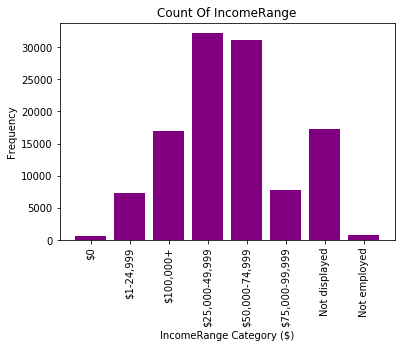

In [8]:
x = loan_clean_new['IncomeRange'].unique()
y = loan_clean_new['IncomeRange'].value_counts()
plt.bar(x,y, color = 'purple');
plt.xticks(rotation=90)
plt.title('Count Of IncomeRange')
plt.xlabel('IncomeRange Category ($)')
plt.ylabel('Frequency');


## (Visualization 2)

>  It can be shown from the Prosper rating (Alpha) in the plot below that AA has the highest maximum whisker length followed by rating A and B. HR has the least rating against the loan amount. The plot shown above has been arranged in a chronological order starting with the highest rating AA to the lowest rating HR.

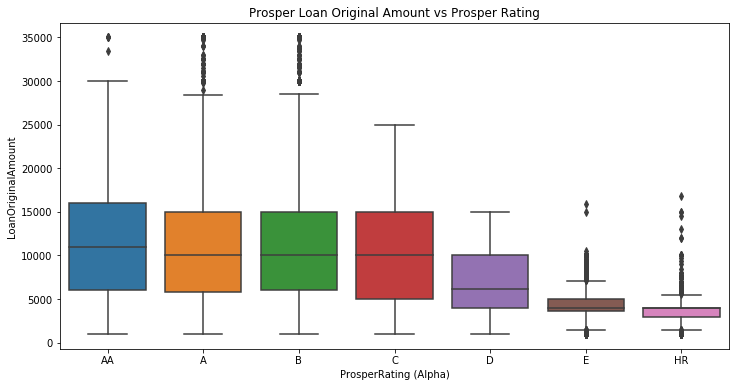

In [9]:
plt.figure(figsize=(12,6))
sb.boxplot(data=loan_clean_new, x='ProsperRating (Alpha)', y='LoanOriginalAmount', order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']);
plt.title('Prosper Loan Original Amount vs Prosper Rating');

## (Visualization 3)

It is shown from the below chart that other professsions or category appllied for loan the most, followed by professionals then the computer programmers. This may appertain to their income range category.

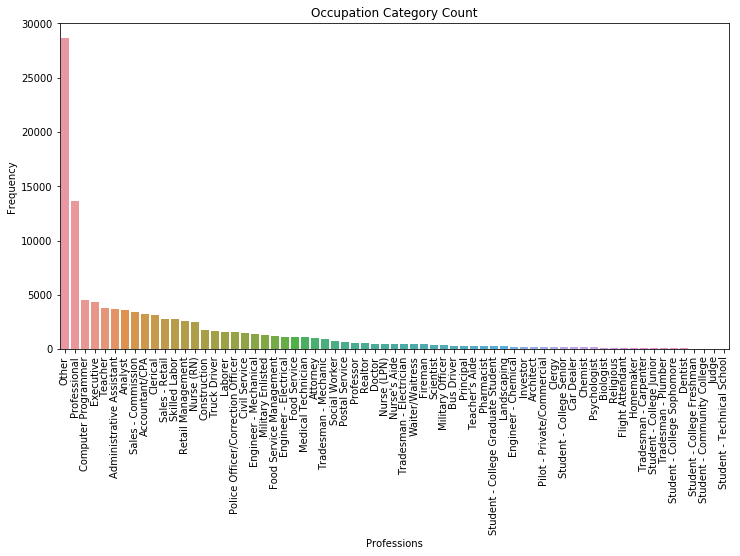

In [10]:
plt.figure(figsize=(12,6))
Occupation_count = loan_clean_new['Occupation'].value_counts()
sb.barplot(Occupation_count.index, Occupation_count);
plt.xticks(rotation=90)
plt.title('Occupation Category Count')
plt.xlabel('Professions')
plt.ylabel('Frequency');


## CONCLUSION

> This is a Prosper Loan Data with 113,937 rows and 81 columns. it shows a loan facility collected from customers across different career of life. Different categories of occupation includes: skilled labor, excutive, sales-retail, computer programmer, food service sale-commission e.t.c. Preliminary wrangling such as checking the non null values and datatypes of each column was done, descriptive statistics was carried out using the describe function, columns record were reduced by dropping the columns from 81 to 45 columns, nan values were dropped and stored in a new Dataframe and data types were converted from float64 to int64. Univariate, bivariate and Multivariate exploration was carried out and some interesting interactions were observed from the exploration of the Prosper Loan Datasets as shown in the observations of all the visualization carried out.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_prosperloan.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_prosperloan.ipynb to slides
[NbConvertApp] Writing 399953 bytes to Part_II_slide_deck_prosperloan.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_prosperloan.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: 